In [1]:
import os,sys
import h5py
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### cosmicGrowth 8411: 
# 1200box_2048npar
# WMAP LambdaCMD: Omb=0.0445, Omc=0.2235, OmL=0.7320, h=0.71, ns=0.968, sigma8=0.83

# snap_files: 
#        'halo.h5.008' (z~1.17) 
#        'halo.h5.014' (z~0.59)

In [18]:
# path on kunlun
snap_path = '/home/xiaodongli/data/work/work/luoxl/cosmicGrowth/8411/'
# path on BSCC_cpu
#snap_path = '/public1/home/scb4289/Data/cosmicGrowth/8411/'
# path on BSCC_gpu
#snap_path = '/data/home/scv4765/run/WaveletST/data/cosmicGrowth/8411/'


snap_name = 'halo.h5.014' # or 'halo.h5.008'


['Cosmology', 'Subhalos']


In [22]:
df = h5py.File(snap_path+snap_name, 'r')
print(list(df.keys()))
print('-'*40)

for key in list(df['Cosmology'].keys()):
    print(key+': '+str(df['Cosmology'][key][0]))

z_snap = 1/df['Cosmology']['ScaleFactor'][0]-1
print('z_snap = ', z_snap)
print('-'*40)
print(df['Subhalos'].dtype)

['Cosmology', 'Subhalos']
----------------------------------------
HubbleParam: 0.13459295
OmegaLambda0: 0.732
OmegaM0: 0.268
ParticleMass: 1.4963388
ScaleFactor: 0.62849313
z_snap =  0.5911072881107586
----------------------------------------
[('TrackId', '<i8'), ('Nbound', '<i8'), ('Mbound', '<f4'), ('HostHaloId', '<i8'), ('Rank', '<i8'), ('Depth', '<i4'), ('LastMaxMass', '<f4'), ('SnapshotIndexOfLastMaxMass', '<i4'), ('SnapshotIndexOfLastIsolation', '<i4'), ('SnapshotIndexOfBirth', '<i4'), ('SnapshotIndexOfDeath', '<i4'), ('SnapshotIndexOfSink', '<i4'), ('RmaxComoving', '<f4'), ('VmaxPhysical', '<f4'), ('LastMaxVmaxPhysical', '<f4'), ('SnapshotIndexOfLastMaxVmax', '<i4'), ('R2SigmaComoving', '<f4'), ('RHalfComoving', '<f4'), ('BoundR200CritComoving', '<f4'), ('BoundM200Crit', '<f4'), ('SpecificSelfPotentialEnergy', '<f4'), ('SpecificSelfKineticEnergy', '<f4'), ('SpecificAngularMomentum', '<f4', (3,)), ('InertialTensor', '<f4', (6,)), ('InertialTensorWeighted', '<f4', (6,)), ('Comovi

In [23]:
Pos  = df['Subhalos']['ComovingMostBoundPosition'] / 1000  # unit: kpc/h        --> Mpc/h
Vel  = df['Subhalos']['PhysicalMostBoundVelocity']         # unit: km/s
Mass = df['Subhalos']['LastMaxMass']*1e10                  # unit: 1e10*M_sun/h --> M_sun/h

In [24]:
# snap3D_columns: X, Y, Z, Vx, Vy, Vz, Mass
snap3D = np.hstack([Pos, Vel, Mass[:,np.newaxis]])

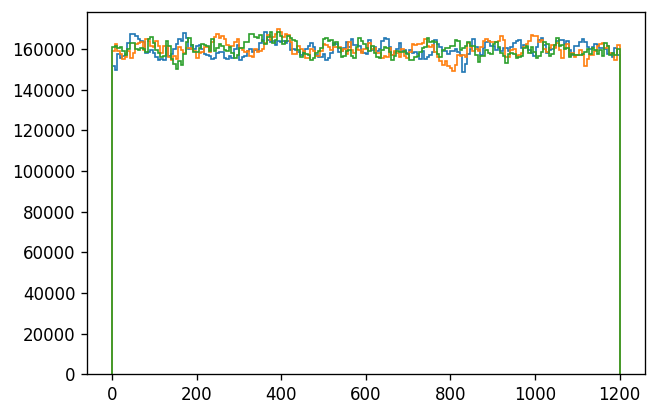

In [25]:
# Boxsize = 1200 Mpc/h

plt.figure(dpi=120)
plt.hist(snap3D[:,0], bins=200, histtype='step');
plt.hist(snap3D[:,1], bins=200, histtype='step');
plt.hist(snap3D[:,2], bins=200, histtype='step');

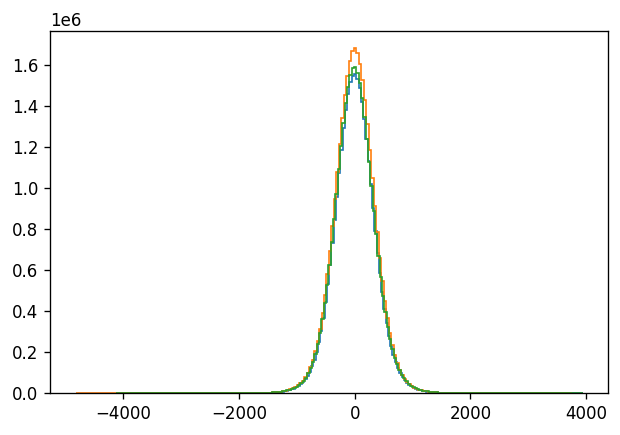

In [26]:
plt.figure(dpi=120)
plt.hist(snap3D[:,3], bins=200, histtype='step');
plt.hist(snap3D[:,4], bins=200, histtype='step');
plt.hist(snap3D[:,5], bins=200, histtype='step');

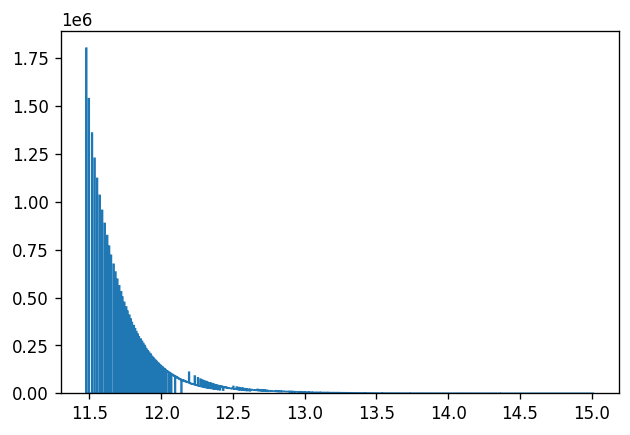

In [31]:
plt.figure(dpi=120)
plt.hist(np.log10(snap3D[:,6]), bins=800, histtype='step');